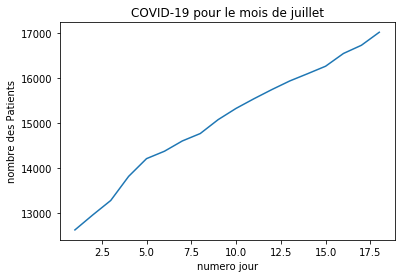

In [40]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('COVID-19(01-07au18-07)(maroc).csv').values

target=dataset[:,0].reshape(-1,1)
data=dataset[:,1].reshape(-1,1)

from matplotlib import pyplot as plt

plt.plot(data,target)
plt.xlabel('numero jour')
plt.ylabel('nombre des Patients')
plt.title('COVID-19 pour le mois de juillet')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=False)
data_new=poly.fit_transform(data)

In [32]:
from sklearn.linear_model import LinearRegression

algorithm=LinearRegression()
algorithm.fit(data_new,target)

print('Coefficients:',algorithm.coef_)
print('Intercept:',algorithm.intercept_)

Coefficients: [[500.05961186 -24.58053836   0.66015939]]
Intercept: [12110.46895425]


In [33]:
from sklearn.metrics import r2_score

predicted_target=algorithm.predict(data_new)

print('r2 score:',r2_score(target,predicted_target))

r2 score: 0.9979421995699624


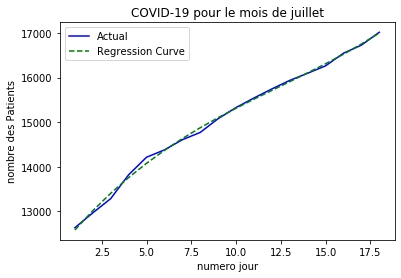

In [34]:
plt.plot(data,target,'b',label='Actual')
plt.plot(data,predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('numero jour')
plt.ylabel('nombre des Patients')
plt.title('COVID-19 pour le mois de juillet')
plt.show()

In [35]:
test_data=np.arange(18,29).reshape(-1,1)
test_data_new=poly.fit_transform(test_data)

In [36]:
predicted_target_next_10_days=algorithm.predict(test_data_new)

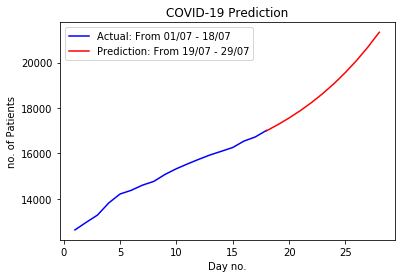

In [37]:
plt.plot(data,target,'b',label='Actual: From 01/07 - 18/07')
plt.plot(test_data,predicted_target_next_10_days,'r',label='Prediction: From 19/07 - 29/07')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients')
plt.title('COVID-19 Prediction')
plt.show()

In [38]:
predicted_target_next_10_days

array([[16997.49707602],
       [17266.06045752],
       [17560.72093223],
       [17885.43945648],
       [18244.17698658],
       [18640.89447884],
       [19079.55288958],
       [19564.11317509],
       [20098.53629171],
       [20686.78319573],
       [21332.81484348]])

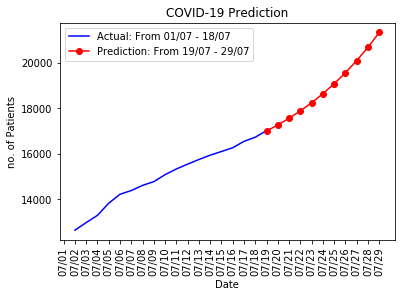

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

Dates=pd.date_range(start="2020-07-01",end="2020-07-29").strftime('%m/%d')

plt.plot(data,target,'b',label='Actual: From 01/07 - 18/07')
plt.plot(test_data,predicted_target_next_10_days,'r-o',label='Prediction: From 19/07 - 29/07')
plt.legend()
plt.xlabel('Date')
plt.ylabel('no. of Patients')
plt.xticks(range(0,len(Dates),1), Dates)
plt.xticks(rotation=90)
plt.title('COVID-19 Prediction')


plt.savefig('Prediction.png')
plt.show()